In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


EDA

In [4]:
df.shape

(31647, 18)

There are 31647 rows and 18 columns out of which 1 is target variable and remaining 17 are independent variables.

In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
df.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

As we can see there are no null values present in this dataset

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


<AxesSubplot:>

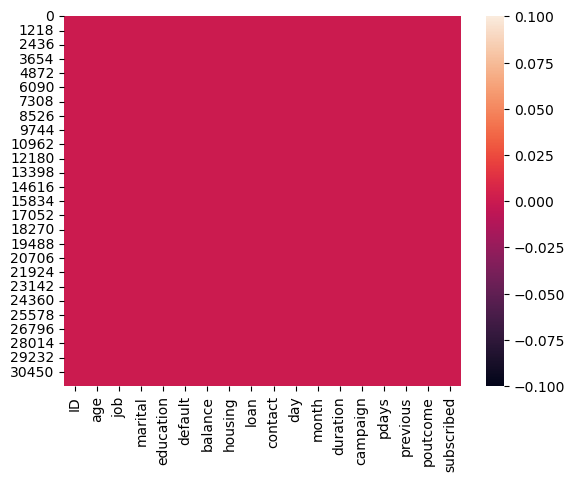

In [11]:
sns.heatmap(df.isnull())

In [12]:
#separating numerical and categorical columns
#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns:",categorical_col)
print("\n")

#checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical Columns: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [13]:
#checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [ ]:
#these are unique values present in the dataset. Here ID column has the data of unique ID
#which can be dropped

In [14]:
df.drop("ID",axis=1,inplace=True)

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [16]:
#statistical sumaary of numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


UNIVARIATE ANALYSIS

no     27932
yes     3715
Name: subscribed, dtype: int64


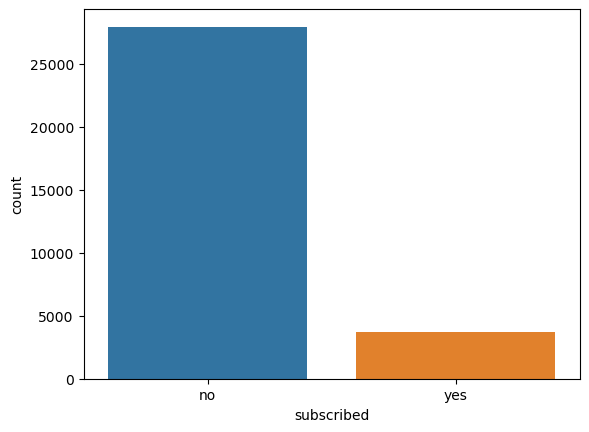

In [17]:
ax=sns.countplot(x='subscribed',data=df)
print(df['subscribed'].value_counts())

As we can see most of the people have not subscribed for term deposit.

<AxesSubplot:>

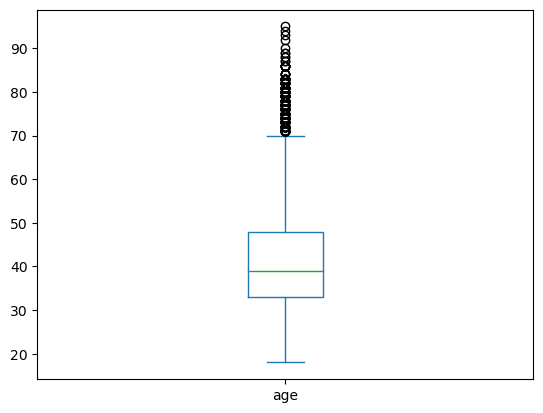

In [19]:
df['age'].plot.box()

As we can see most of the people are above the age of 50

<AxesSubplot:xlabel='job', ylabel='count'>

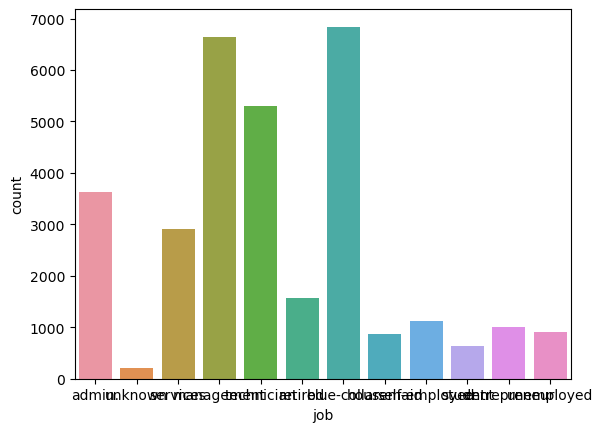

In [30]:
sns.countplot(df['job'])

<AxesSubplot:xlabel='marital', ylabel='count'>

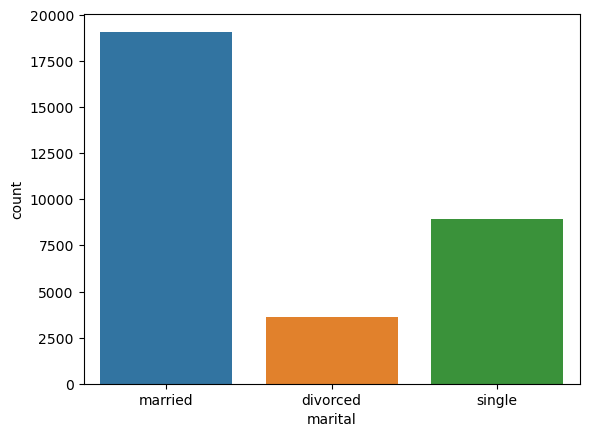

In [32]:
sns.countplot(df['marital'])

Most of the customers are married

<AxesSubplot:xlabel='education', ylabel='count'>

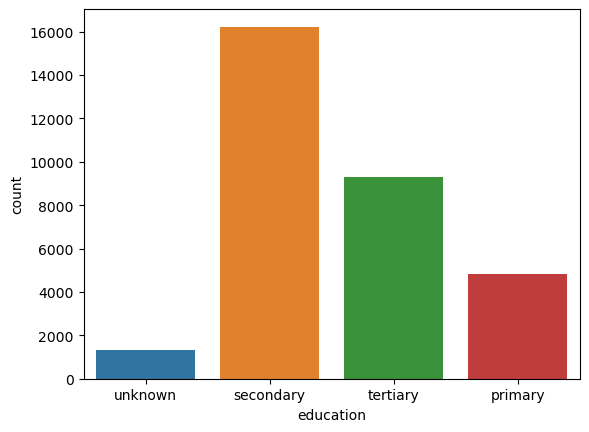

In [33]:
sns.countplot(df['education'])

Most of the customers are educated till secondary

<AxesSubplot:xlabel='default', ylabel='count'>

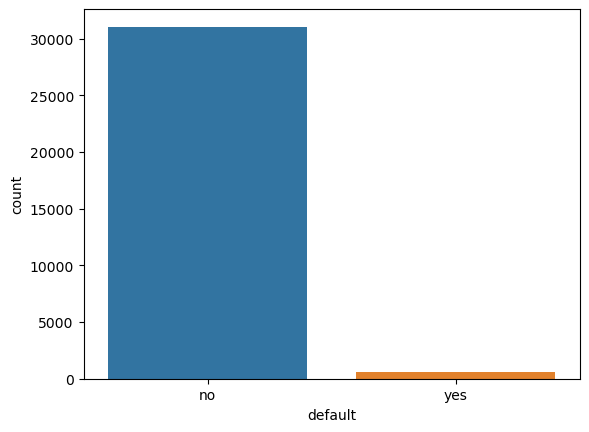

In [34]:
sns.countplot(df['default'])

Most of the customers have credit as default

<AxesSubplot:xlabel='housing', ylabel='count'>

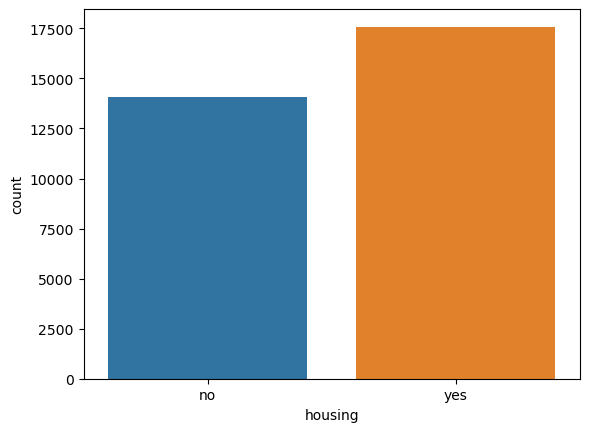

In [35]:
sns.countplot(df['housing'])

Most of the customers have housing loan

<AxesSubplot:xlabel='loan', ylabel='count'>

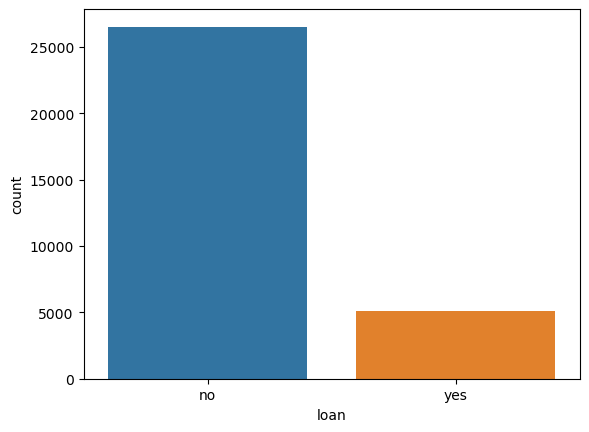

In [36]:
sns.countplot(df['loan'])

Most have customers have no personal loan

<AxesSubplot:xlabel='contact', ylabel='count'>

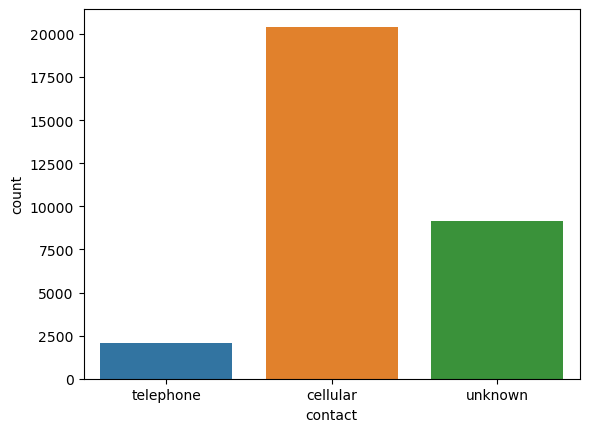

In [37]:
sns.countplot(df['contact'])

Most of the customers are connected through cellular contact

<AxesSubplot:xlabel='day'>

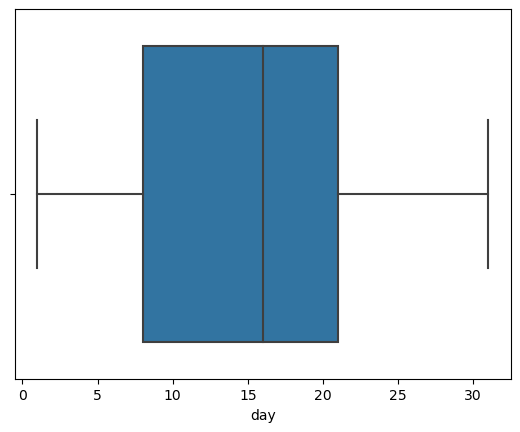

In [40]:
sns.boxplot(df['day'])

Most of the customers are contacted between 6 and 16 day 

<AxesSubplot:xlabel='month', ylabel='count'>

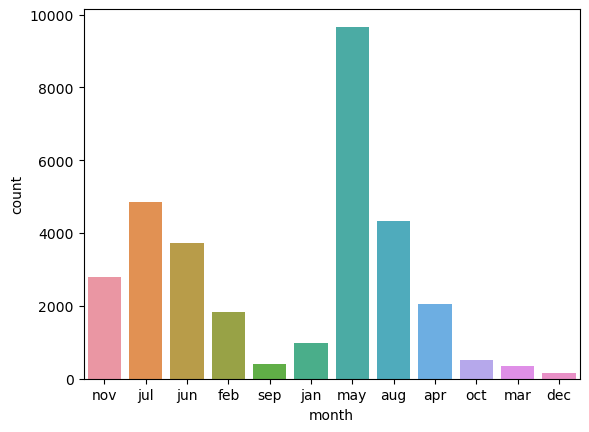

In [41]:
sns.countplot(df['month'])

Most of the customers are contacted in the month of may

<AxesSubplot:xlabel='duration'>

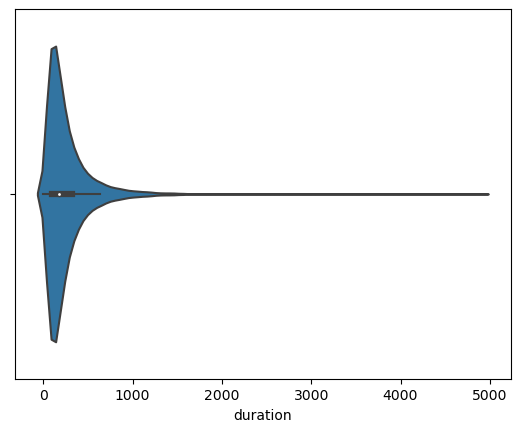

In [45]:
sns.violinplot(df['duration'])

Most of the customers are contacted between 1 min to 1000 mins when contacted

<AxesSubplot:xlabel='campaign'>

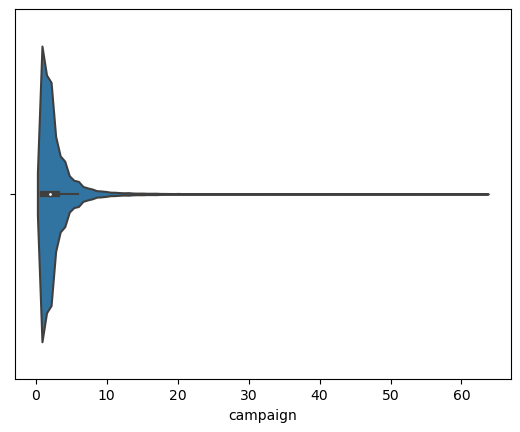

In [47]:
sns.violinplot(df['campaign'])

Most of the customers were contacted 1 to 2 times during the campaign

<AxesSubplot:xlabel='pdays'>

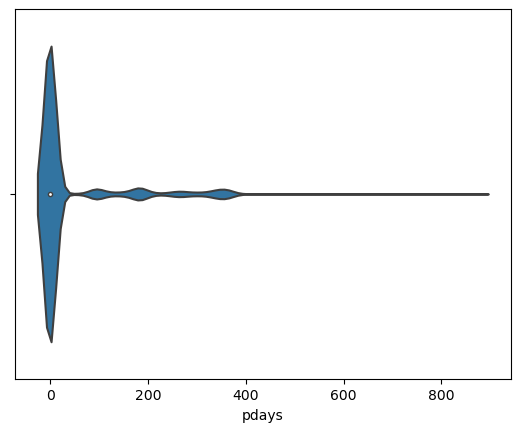

In [50]:
sns.violinplot(df['pdays'])

number of days that passed by after the client was last contacted is between 0 to 100 days

<AxesSubplot:xlabel='previous'>

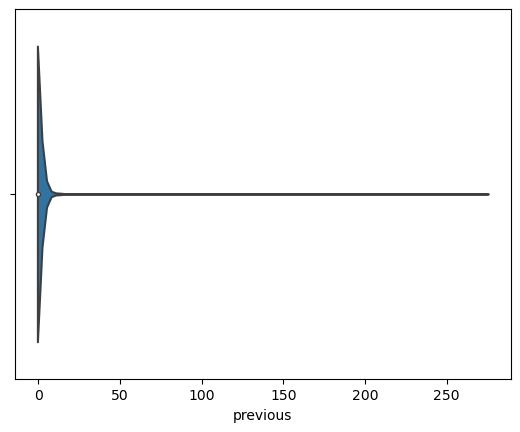

In [53]:
sns.violinplot(df['previous'])

number of contacts performed before this campaign is from 0 to 3 days

<AxesSubplot:xlabel='poutcome', ylabel='count'>

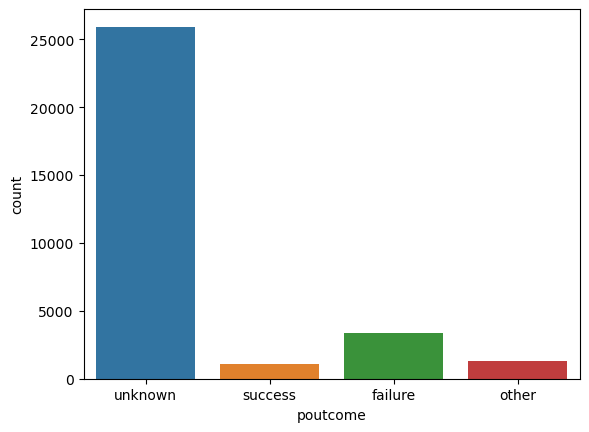

In [54]:
sns.countplot(df['poutcome'])

outcome of the previous marketing campaign is unknown

Bivariate Analysis

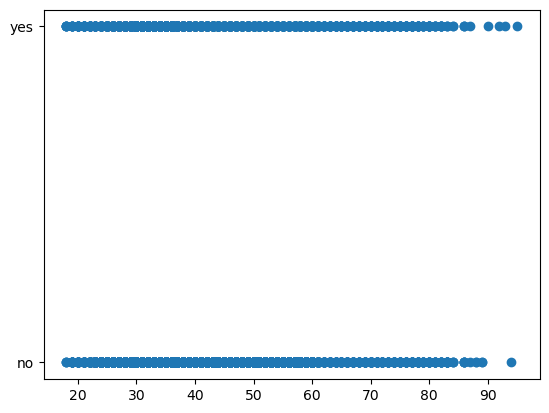

In [57]:
plt.scatter(df['age'],df['subscribed'])

Most of the people who have subscribed for the term deposit are between age 50 to 80

<AxesSubplot:xlabel='job', ylabel='subscribed'>

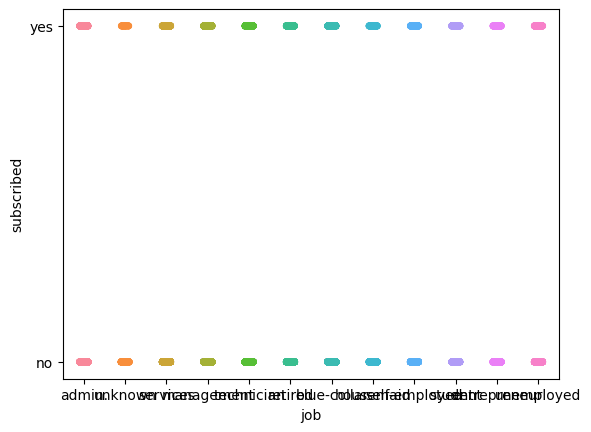

In [65]:
sns.stripplot(x="job",y="subscribed", data=df)

<AxesSubplot:xlabel='marital', ylabel='subscribed'>

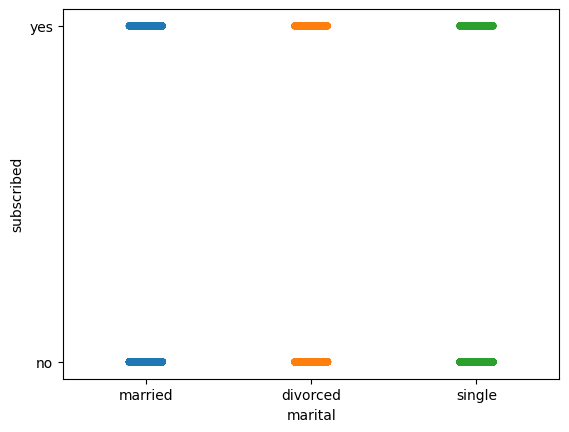

In [69]:
sns.stripplot(x="marital",y="subscribed", data=df)

<AxesSubplot:xlabel='education', ylabel='subscribed'>

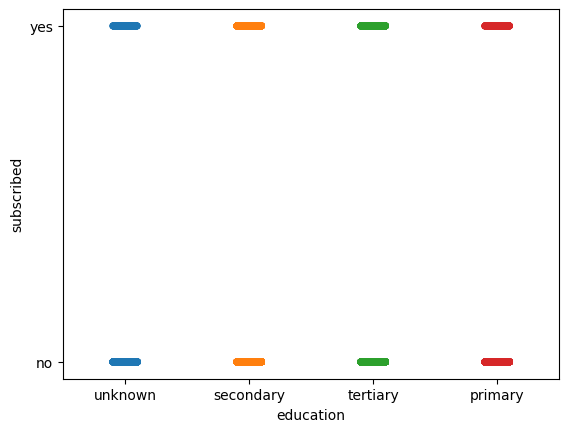

In [70]:
sns.stripplot(x="education",y="subscribed", data=df)

<AxesSubplot:xlabel='default', ylabel='subscribed'>

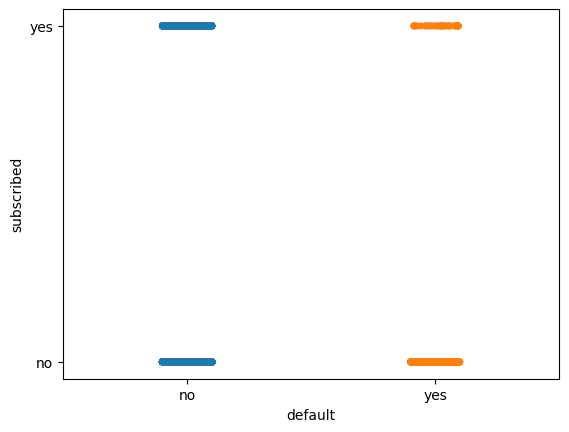

In [73]:
sns.stripplot(x="default",y="subscribed", data=df)

<AxesSubplot:xlabel='balance', ylabel='subscribed'>

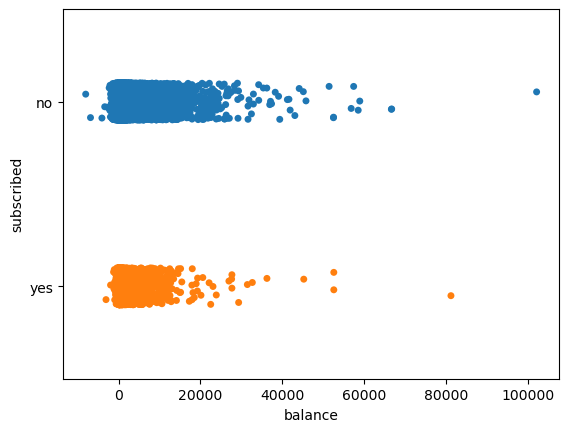

In [74]:
sns.stripplot(x="balance",y="subscribed", data=df)

<AxesSubplot:xlabel='housing', ylabel='subscribed'>

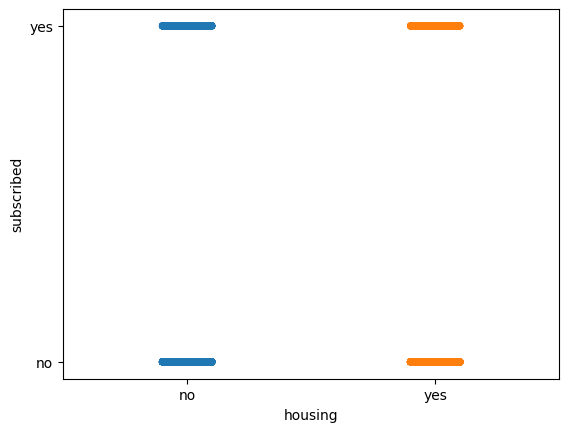

In [75]:
sns.stripplot(x="housing",y="subscribed", data=df)

<AxesSubplot:xlabel='loan', ylabel='subscribed'>

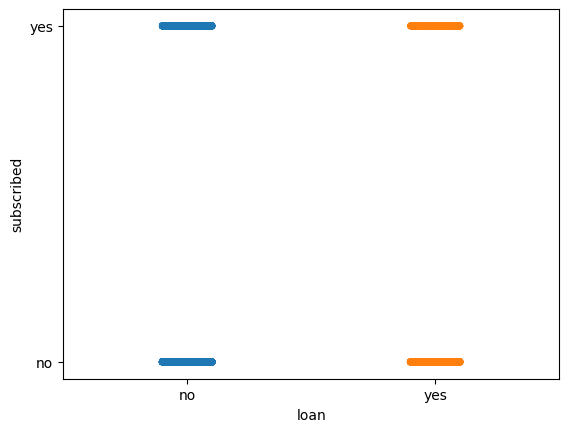

In [76]:
sns.stripplot(x="loan",y="subscribed", data=df)

<AxesSubplot:xlabel='contact', ylabel='subscribed'>

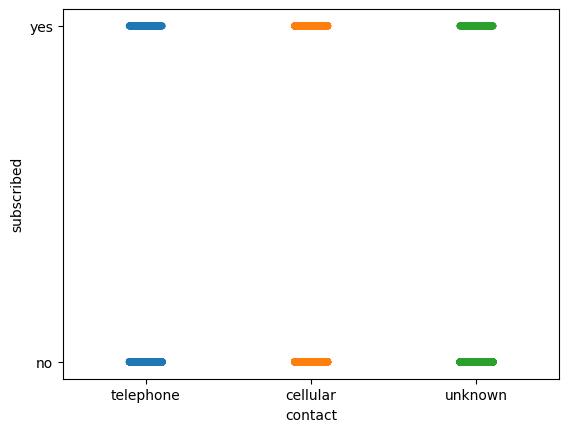

In [77]:
sns.stripplot(x="contact",y="subscribed", data=df)

<AxesSubplot:xlabel='day', ylabel='subscribed'>

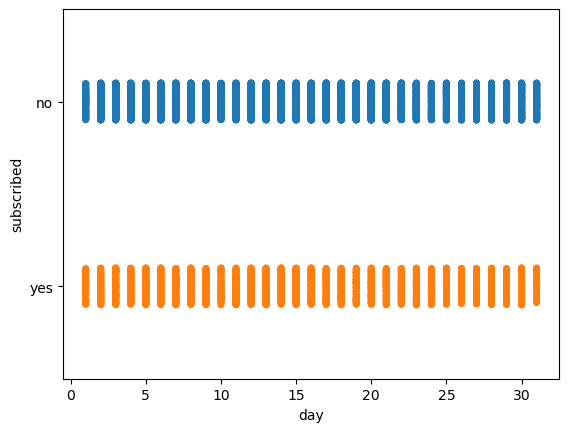

In [78]:
sns.stripplot(x="day",y="subscribed", data=df)

<AxesSubplot:xlabel='month', ylabel='subscribed'>

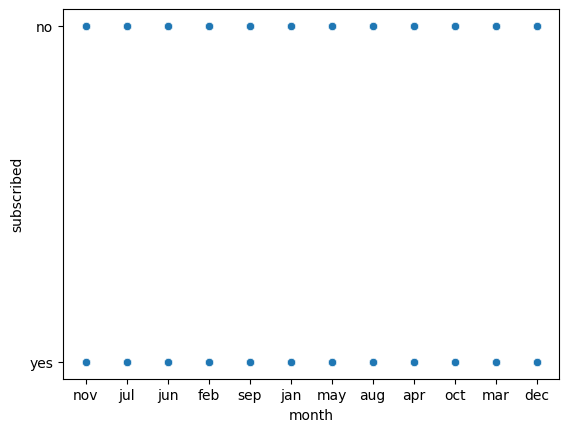

In [81]:
sns.scatterplot(x="month",y="subscribed", data=df)

<AxesSubplot:xlabel='subscribed', ylabel='duration'>

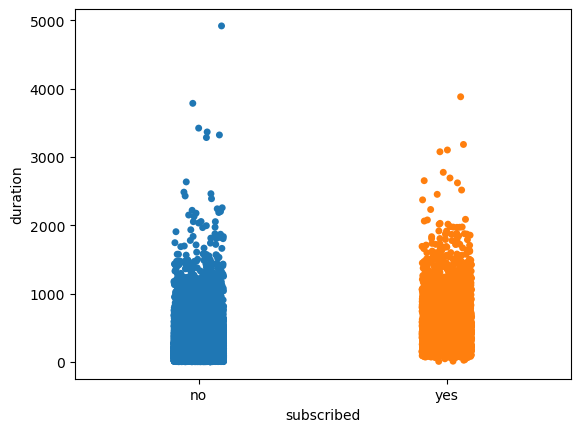

In [83]:
sns.stripplot(x="subscribed",y="duration", data=df)

<AxesSubplot:xlabel='subscribed', ylabel='campaign'>

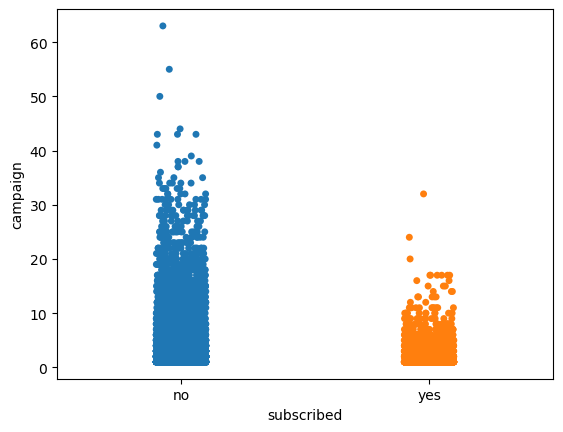

In [85]:
sns.stripplot(x="subscribed",y="campaign", data=df)

people with no subscription were contacted more than the people who subscribed

<AxesSubplot:xlabel='subscribed', ylabel='pdays'>

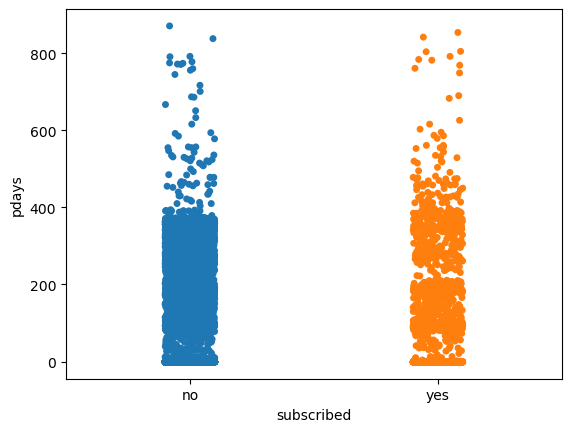

In [86]:
sns.stripplot(x="subscribed",y="pdays", data=df)

the numbers of day passed of the client last contacted are almost same for both

<AxesSubplot:xlabel='subscribed', ylabel='previous'>

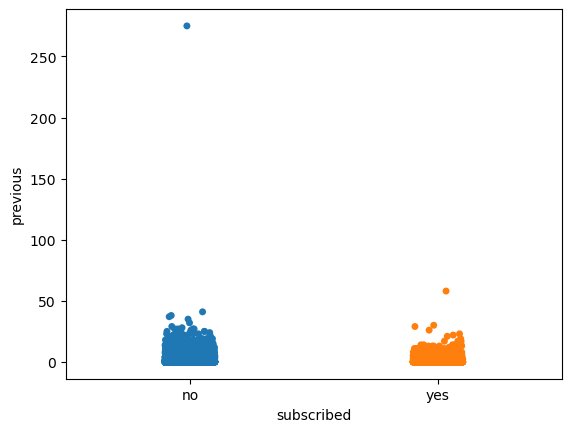

In [87]:
sns.stripplot(x="subscribed",y="previous", data=df)

number of campaigns done previously are same for both

<AxesSubplot:xlabel='subscribed', ylabel='poutcome'>

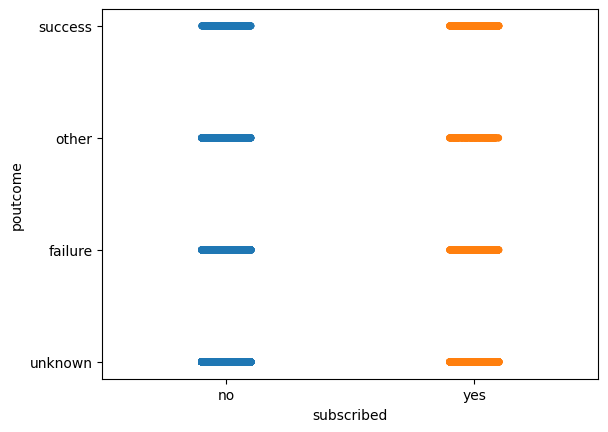

In [88]:
sns.stripplot(x="subscribed",y="poutcome", data=df)

the outcome of the previous campaign are the same for both 

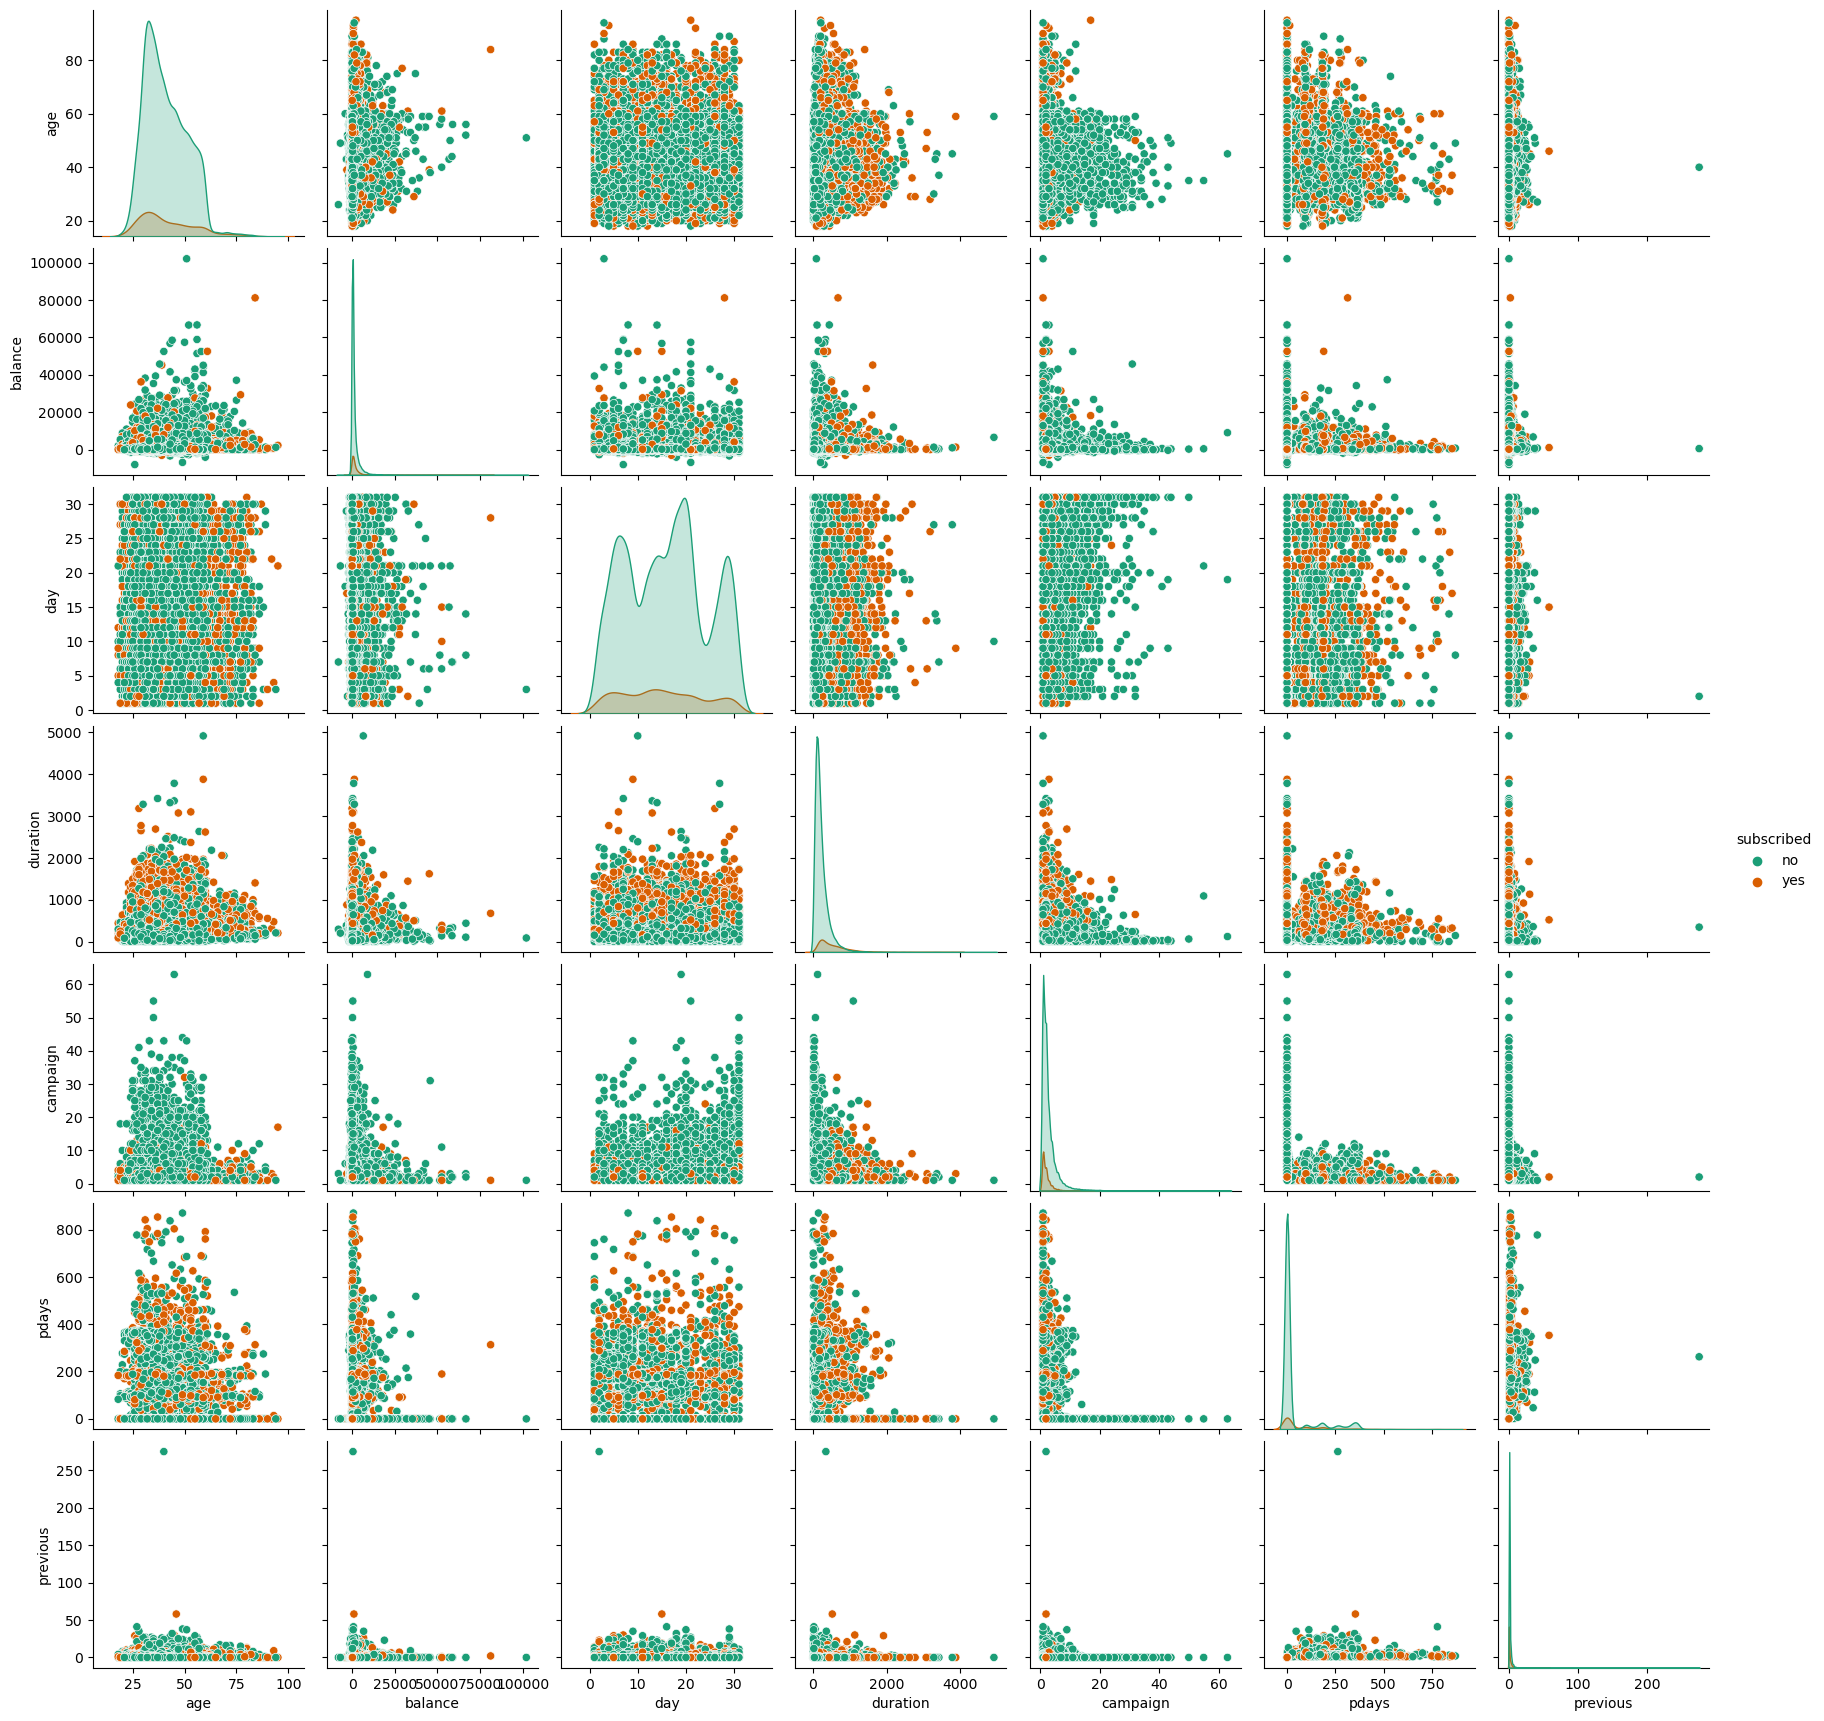

In [90]:
sns.pairplot(df,hue='subscribed',palette='Dark2')
plt.show()

age            AxesSubplot(0.125,0.53;0.110714x0.35)
balance     AxesSubplot(0.257857,0.53;0.110714x0.35)
day         AxesSubplot(0.390714,0.53;0.110714x0.35)
duration    AxesSubplot(0.523571,0.53;0.110714x0.35)
campaign    AxesSubplot(0.656429,0.53;0.110714x0.35)
pdays       AxesSubplot(0.789286,0.53;0.110714x0.35)
previous       AxesSubplot(0.125,0.11;0.110714x0.35)
dtype: object

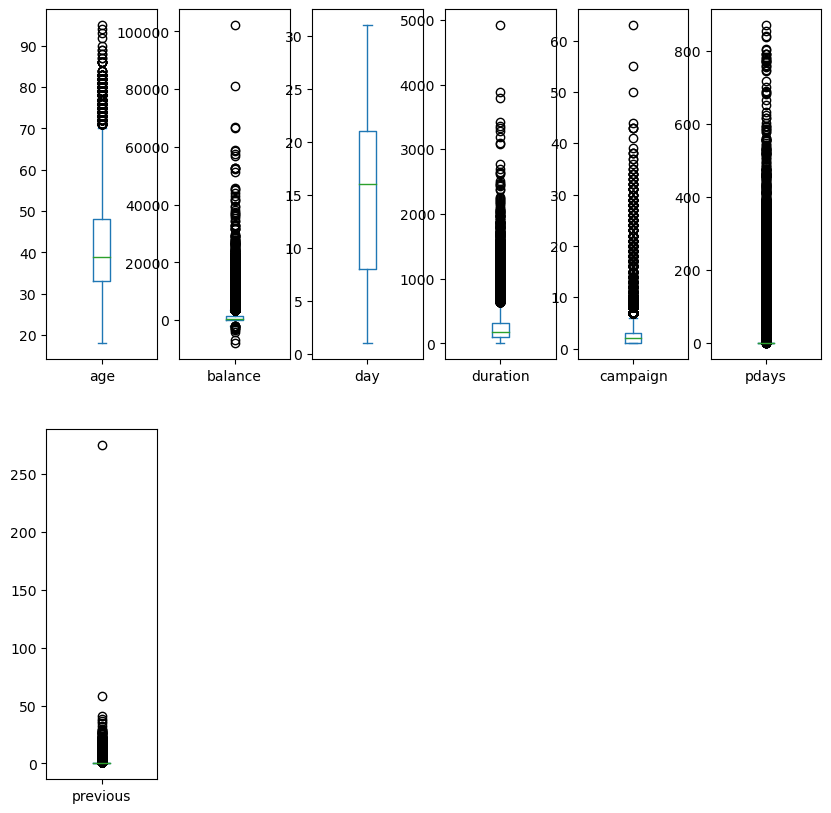

In [93]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [95]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [96]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777,0.364694
31643,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777,2.742026
31644,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777,0.364694
31645,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048,0.364694


In [97]:
threshold=3
print(np.where(z>3))

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64), array([ 4, 12,  5, ..., 13, 14, 11], dtype=int64))


In [98]:
df1=df[(z<3).all(axis=1)]

In [99]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4.0,2.0,1.0,0.0,2968,0.0,0.0,2.0,20,6.0,30,4,-1,0,3.0,0.0
31641,37,9.0,2.0,2.0,0.0,1309,0.0,0.0,2.0,6,6.0,442,2,-1,0,3.0,0.0
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0


In [100]:
df1.shape

(27584, 17)

In [102]:
df1.skew()

age           0.439159
job           0.258302
marital      -0.095968
education     0.197092
default       0.000000
balance       2.433928
housing      -0.207765
loan          1.829242
contact       0.698882
day           0.075854
month        -0.469448
duration      1.596175
campaign      2.064222
pdays         2.799415
previous      3.657231
poutcome     -2.449518
subscribed    2.624756
dtype: float64

In [103]:
df1['previous']=np.cbrt(df1['previous'])

In [104]:
df1.skew()

age           0.439159
job           0.258302
marital      -0.095968
education     0.197092
default       0.000000
balance       2.433928
housing      -0.207765
loan          1.829242
contact       0.698882
day           0.075854
month        -0.469448
duration      1.596175
campaign      2.064222
pdays         2.799415
previous      2.275265
poutcome     -2.449518
subscribed    2.624756
dtype: float64

In [106]:
df1.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,27584.000000,27584.000000,27584.000000,27584.000000,27584.0,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000,27584.000000
mean,40.663754,4.349550,1.168757,1.225819,0.0,1107.416945,0.551660,0.162558,0.669591,15.846795,5.487710,235.780307,2.452509,24.785093,0.183616,2.665458,0.102306
std,10.092015,3.289485,0.604801,0.747117,0.0,1724.751049,0.497333,0.368969,0.912013,8.386351,2.992879,190.115295,1.933077,70.699699,0.463653,0.879023,0.303055
min,18.000000,0.000000,0.000000,0.000000,0.0,-4057.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.0,79.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.0,449.000000,1.000000,0.000000,0.000000,16.000000,6.000000,178.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.0,1381.000000,1.000000,0.000000,2.000000,22.000000,8.000000,306.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,72.000000,11.000000,2.000000,3.000000,0.0,10443.000000,1.000000,1.000000,2.000000,31.000000,11.000000,1029.000000,12.000000,337.000000,1.912931,3.000000,1.000000


In [107]:
cor=df1.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.030442,-0.411279,-0.101482,NaN,0.093209,-0.155100,0.005722,0.031171,-0.010067,-0.041290,-0.026249,0.035203,-0.010056,0.001669,0.000650,-0.006545
job,-0.030442,1.000000,0.068169,0.171837,NaN,0.023775,-0.124102,-0.037678,-0.084352,0.021324,-0.087652,-0.001964,0.004321,0.002898,0.016931,-0.012342,0.037552
marital,-0.411279,0.068169,1.000000,0.112713,NaN,0.011066,-0.027720,-0.045605,-0.042390,-0.008776,-0.002910,0.015562,-0.022340,0.014704,0.024525,-0.015937,0.056722
education,-0.101482,0.171837,0.112713,1.000000,NaN,0.052312,-0.098381,-0.047816,-0.122955,0.016973,-0.057185,0.001121,-0.007422,0.026627,0.054989,-0.041355,0.075855
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.093209,0.023775,0.011066,0.052312,NaN,1.000000,-0.057183,-0.094902,-0.037444,0.009251,0.031738,0.032218,-0.014114,0.039717,0.061087,-0.056917,0.070139
housing,-0.155100,-0.124102,-0.027720,-0.098381,NaN,-0.057183,1.000000,0.037213,0.214919,-0.013201,0.272980,0.011401,-0.040230,0.072516,0.010892,-0.049449,-0.149084
loan,0.005722,-0.037678,-0.045605,-0.047816,NaN,-0.094902,0.037213,1.000000,-0.011361,0.011915,0.027286,-0.010625,-0.002137,-0.006355,-0.016390,0.000010,-0.075136
contact,0.031171,-0.084352,-0.042390,-0.122955,NaN,-0.037444,0.214919,-0.011361,1.000000,-0.027797,0.392408,-0.023682,0.003623,-0.240344,-0.258525,0.249448,-0.159186
day,-0.010067,0.021324,-0.008776,0.016973,NaN,0.009251,-0.013201,0.011915,-0.027797,1.000000,0.017840,-0.026854,0.131437,-0.056260,-0.051235,0.045900,-0.029537


In [109]:
df1.drop("default",axis=1,inplace=True)

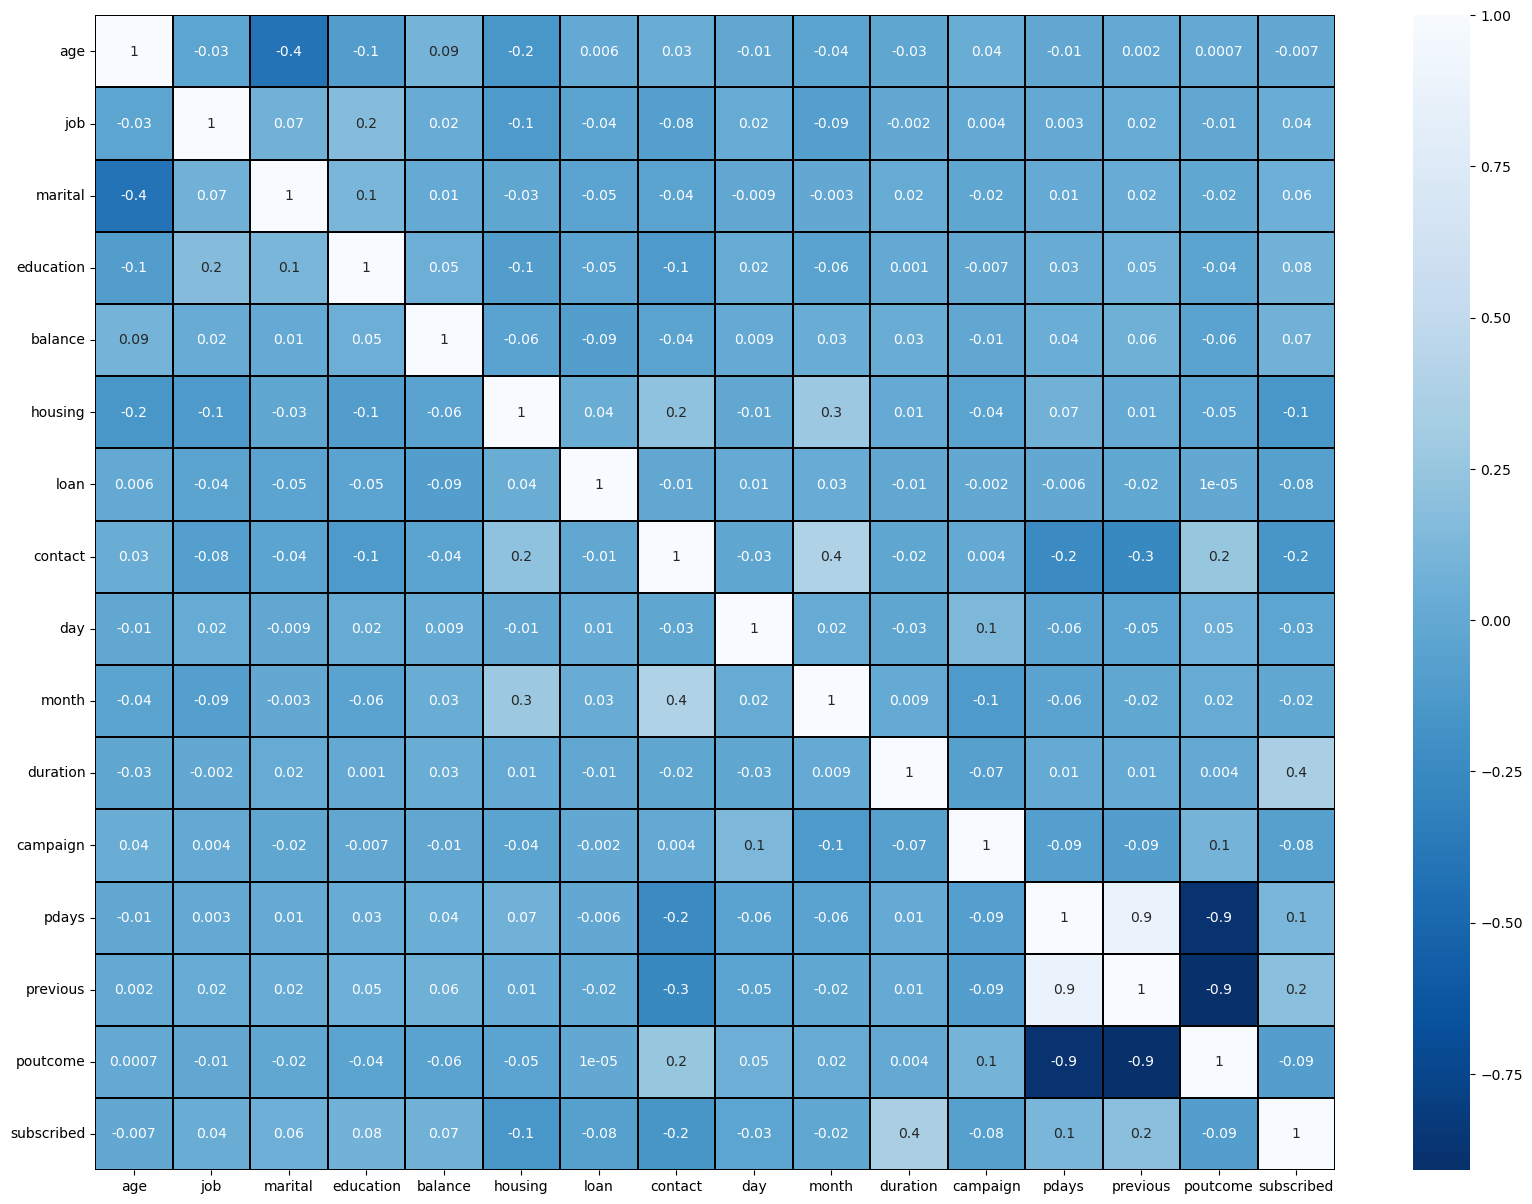

In [110]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidth=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

In [111]:
cor['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.352371
previous      0.190483
pdays         0.116595
education     0.075855
balance       0.070139
marital       0.056722
job           0.037552
age          -0.006545
month        -0.021757
day          -0.029537
loan         -0.075136
campaign     -0.076303
poutcome     -0.091172
housing      -0.149084
contact      -0.159186
default            NaN
Name: subscribed, dtype: float64

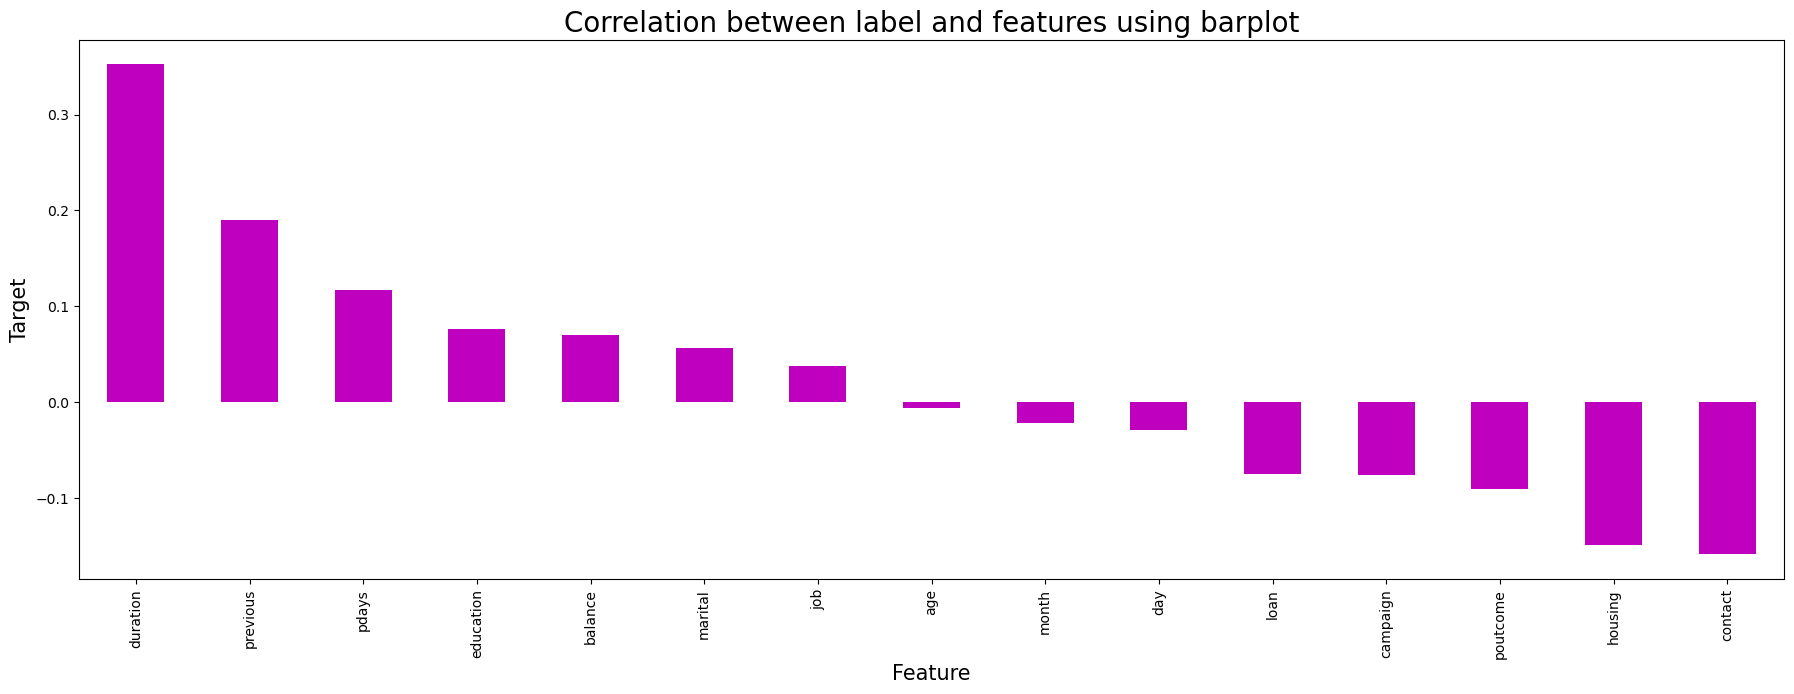

In [112]:
plt.figure(figsize=(22,7))
df1.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between label and features using barplot',fontsize=20)
plt.show()

In [114]:
x=df1.drop('subscribed',axis=1)
y=df1['subscribed']

In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.519669,-1.322283,-0.279034,2.374747,0.478677,-1.109257,-0.440582,0.362292,0.375999,1.173570,-1.008776,-0.234092,-0.36472,-0.396028,0.380591
1,-0.957582,2.021767,-0.279034,-0.302260,-0.640346,-1.109257,-0.440582,-0.734204,0.495243,-0.162960,-0.761553,-0.234092,-0.36472,-0.396028,0.380591
2,-1.353942,0.805749,-0.279034,-0.302260,-0.125479,0.901504,-0.440582,-0.734204,0.256756,-0.162960,0.022196,-0.751411,-0.36472,-0.396028,0.380591
3,1.618759,-0.106265,-1.932500,1.036243,1.263732,-1.109257,-0.440582,-0.734204,0.733730,0.171173,3.320254,-0.751411,0.83757,2.714652,-0.757057
4,-0.957582,1.413758,-0.279034,-0.302260,-0.573088,0.901504,-0.440582,-0.734204,-1.412654,-0.831225,0.758604,-0.751411,-0.36472,-0.396028,0.380591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27579,0.231499,-0.106265,1.374431,-0.302260,1.078774,-1.109257,-0.440582,1.458787,0.495243,0.171173,-1.082417,0.800547,-0.36472,-0.396028,0.380591
27580,-0.363042,1.413758,1.374431,1.036243,0.116879,-1.109257,-0.440582,1.458787,-1.174167,0.171173,1.084728,-0.234092,-0.36472,-0.396028,0.380591
27581,-1.155762,-0.106265,1.374431,1.036243,-0.642085,0.901504,-0.440582,-0.734204,-0.458705,0.839438,-0.630052,-0.234092,-0.36472,-0.396028,0.380591
27582,1.222399,-0.106265,-1.932500,1.036243,-0.421759,-1.109257,2.269725,-0.734204,-1.293410,0.171173,1.063688,-0.234092,-0.36472,-0.396028,0.380591


In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Feature']=x.columns
vif

,VIF values,Feature
0,1.273759,age
1,1.050356,job
2,1.228886,marital
3,1.068591,education
4,1.034151,balance
5,1.187734,housing
6,1.017450,loan
7,1.329138,contact
8,1.025967,day
9,1.291050,month


In [117]:
y.value_counts()

0.0    24762
1.0     2822
Name: subscribed, dtype: int64

In [118]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1129)'))) - skipping


In [119]:
y1.value_counts()

0.0    24762
1.0    24762
Name: subscribed, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'at random_state',maxRS)

KeyboardInterrupt: 

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [122]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [123]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9149347510874819
[[7307  121]
 [ 583  265]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7428
         1.0       0.69      0.31      0.43       848

    accuracy                           0.91      8276
   macro avg       0.81      0.65      0.69      8276
weighted avg       0.90      0.91      0.90      8276



In [124]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.9072015466408894
[[7280  148]
 [ 620  228]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7428
         1.0       0.61      0.27      0.37       848

    accuracy                           0.91      8276
   macro avg       0.76      0.62      0.66      8276
weighted avg       0.89      0.91      0.89      8276



In [125]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9094973417109715
[[7341   87]
 [ 662  186]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7428
         1.0       0.68      0.22      0.33       848

    accuracy                           0.91      8276
   macro avg       0.80      0.60      0.64      8276
weighted avg       0.89      0.91      0.89      8276



In [126]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9136056065732238
[[7274  154]
 [ 561  287]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7428
         1.0       0.65      0.34      0.45       848

    accuracy                           0.91      8276
   macro avg       0.79      0.66      0.70      8276
weighted avg       0.90      0.91      0.90      8276



In [127]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9088931851135814
[[7251  177]
 [ 577  271]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      7428
         1.0       0.60      0.32      0.42       848

    accuracy                           0.91      8276
   macro avg       0.77      0.65      0.68      8276
weighted avg       0.89      0.91      0.90      8276



In [128]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9069598840019333
[[7226  202]
 [ 568  280]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7428
         1.0       0.58      0.33      0.42       848

    accuracy                           0.91      8276
   macro avg       0.75      0.65      0.69      8276
weighted avg       0.89      0.91      0.90      8276



In [129]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9130014499758338
[[7306  122]
 [ 598  250]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7428
         1.0       0.67      0.29      0.41       848

    accuracy                           0.91      8276
   macro avg       0.80      0.64      0.68      8276
weighted avg       0.90      0.91      0.90      8276



In [130]:
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.90721858 0.96516911 0.96607774 0.96961131 0.9654685 ]
0.9547090453003044
Difference between Accuracy score and cross validation score is- -0.039774294212822525


In [131]:
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.80191822 0.80787481 0.81443715 0.81837456 0.80765347]
0.8100516436844695
Difference between Accuracy score and cross validation score is- 0.10488310740301243


In [132]:
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score.mean())

[0.84856133 0.9246845  0.92609793 0.9367996  0.92659532]
0.9125477353925294
Difference between Accuracy score and cross validation score is- 0.0010578711806943364


In [134]:
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score.mean())

KeyboardInterrupt: 

In [135]:
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score.mean())

[0.82645129 0.90065623 0.89924281 0.89863705 0.89701131]
0.8843997377346504
Difference between Accuracy score and cross validation score is- 0.024493447378931


In [136]:
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score.mean())

[0.87269056 0.95365977 0.95477032 0.95739525 0.95537157]
0.9387774936207378
Difference between Accuracy score and cross validation score is- -0.03181760961880453


In [137]:
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score.mean())

[0.95830389 0.967895   0.97031802 0.97163049 0.96910339]
0.9674501585743073
Difference between Accuracy score and cross validation score is- -0.054448708598473505
